In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
import datetime 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# Load train, test data
data = pd.read_csv('training_data.csv',error_bad_lines=False) #read csv file
test = pd.read_csv('test_data.csv',error_bad_lines=False) #read csv file
positive_word = pd.read_csv('positive-words.csv',error_bad_lines=False) #read csv file
negative_word = pd.read_csv('negative-words.csv',error_bad_lines=False) #read csv file

In [4]:
# check the shape of data
print(data.shape)
print(test.shape)

(7997, 6)
(2003, 5)


In [5]:
test.head()

,review_id,business_id,user_id,text,date
0,2713,668,2196,Ticoz is not a bad place. The menu is eclecti...,2009-01-04
1,4734,1014,3521,"Wow!\nBeing a Phoenix native, we have enjoyed ...",2010-10-05
2,5598,2939,3028,Jodi is fantastic! Extraordinary! After too ...,2011-04-29
3,9545,4077,6200,T&S Glass did a wonderful job replacing my car...,2007-10-02
4,1471,1126,1268,My experience was on a random Saturday afterno...,2010-08-16


In [6]:
data.head()

,review_id,business_id,user_id,text,date,stars
0,3223,2055,2533,"Sometimes things happen, and when they do this...",2010-12-30,5
1,9938,4165,6371,I know Kerrie through my networking and we ben...,2011-04-26,5
2,7123,869,4929,Love their pizza!!!\nVery fresh. Their cannoli...,2012-09-28,5
3,3601,1603,2789,Being from NJ I am always on the prowl for my ...,2009-06-07,4
4,3948,2347,1245,We have tried this spot a few times and each v...,2011-02-20,4


In [7]:
# check null data
data.isnull().values.any()

False

In [8]:
# check null data
test.isnull().values.any()

False

In [9]:
type(data['text'])

pandas.core.series.Series

In [10]:
#print(data['text'])

In [11]:
#train
cv = CountVectorizer()
tf = cv.fit_transform(data['text']).toarray()
#test
cv_test = CountVectorizer()
tf_test = cv.fit_transform(test['text']).toarray()

In [12]:
#cv.vocabulary_
#print(cv.vocabulary_)
#plt.figure();
#plt.bar(cv.vocabulary_)

In [13]:
feature_name = cv.get_feature_names() 
#feature_name

In [14]:
#print(cv.vocabulary_['good'])
#print(cv.vocabulary_['bad'])
#print(cv.vocabulary_['enjoy'])
 

In [15]:
#tf_norm = tf[2] / np.sqrt(np.sum(tf[2]**2))
#tf_norm

In [16]:
#train
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(data['text'])
#test
tfidf_vectorizer_test = TfidfVectorizer()
tfidf_vectorizer_test.fit(test['text'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [17]:
np.set_printoptions(precision=2)
#print(tfidf_vectorizer.transform(data['text']).toarray())
text_result = tfidf_vectorizer.transform(data['text']).toarray()
print(text_result.shape)

#test
text_result_test = tfidf_vectorizer_test.transform(test['text']).toarray()

(7997, 26351)


In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver='auto')
reduced = pca.fit_transform(text_result)
print(reduced)
#print(pca.explained_variance_ratio_)  
#print(pca.singular_values_)  

[[-0.07  0.09]
 [-0.12 -0.02]
 [-0.16 -0.06]
 ...
 [ 0.06  0.24]
 [ 0.1   0.27]
 [-0.21 -0.04]]


In [19]:
#test
reduced_test = pca.fit_transform(text_result_test)
reduced_test

array([[-0.06, -0.04],
       [ 0.23,  0.05],
       [-0.12,  0.05],
       ...,
       [-0.04,  0.06],
       [ 0.07,  0.08],
       [-0.03, -0.16]])

In [24]:
type(reduced)
print(reduced.shape)

(7997, 2)


In [21]:
data.head()

,review_id,business_id,user_id,text,date,stars
0,3223,2055,2533,"Sometimes things happen, and when they do this...",2010-12-30,5
1,9938,4165,6371,I know Kerrie through my networking and we ben...,2011-04-26,5
2,7123,869,4929,Love their pizza!!!\nVery fresh. Their cannoli...,2012-09-28,5
3,3601,1603,2789,Being from NJ I am always on the prowl for my ...,2009-06-07,4
4,3948,2347,1245,We have tried this spot a few times and each v...,2011-02-20,4


In [22]:
train_time_array = array(data.date)
test_time_array = array(test.date)

#train
train_year_array = np.empty_like(train_time_array) #Initialize nparra with same size as train data (Year)
train_month_array = np.empty_like(train_time_array) #Initialize nparra with same size as train data (Month)
train_day_array = np.empty_like(train_time_array) #Initialize nparra with same size as train data (Day)
#test
test_year_array = np.empty_like(test_time_array) #Initialize nparra with same size as train data (Year)
test_month_array = np.empty_like(test_time_array) #Initialize nparra with same size as train data (Month)
test_day_array = np.empty_like(test_time_array)

#train
for i in range(len(data)): #Split the date and the time 
    train_date = datetime.datetime.strptime(train_time_array[i], "%Y-%m-%d")
    train_year_array[i] = train_date.year
    train_month_array[i] = train_date.month
    train_day_array[i] = train_date.day
#test   
for i in range(len(test)): #Split the date and the time 
    test_date = datetime.datetime.strptime(test_time_array[i], "%Y-%m-%d")
    test_year_array[i] = test_date.year
    test_month_array[i] = test_date.month
    test_day_array[i] = test_date.day
   


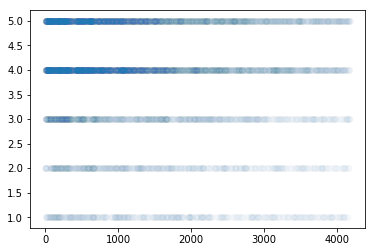

In [143]:
#plt.scatter(x=train_year_array,y=data.stars,alpha=.05)
plt.scatter(x=data.business_id,y=data.stars,alpha=.01)
plt.show()

In [25]:
pw = []
for i in range(len(data)):
    pw = np.append(pw,0)
    
for i in range(len(data)):
    count = 0
    for j in range(len(positive_word.word)):
        word = positive_word.word[j]
        string = data.text[i]
        if word in string:
            count = count +1
            pw[i] = count


In [107]:
pw_test = []
for i in range(len(test)):
    pw_test = np.append(pw_test,0)
    
for i in range(len(test)):
    count = 0
    for j in range(len(positive_word.word)):
        word = positive_word.word[j]
        string = test.text[i]
        if word in string:
            count = count +1
            pw_test[i] = count



In [124]:
nw = []
for i in range(len(data)):
    nw = np.append(nw,0)
    
for i in range(len(data)):
    count = 0
    for j in range(len(negative_word.word)):
        word = negative_word.word[j]
        string = data.text[i]
        if word in string:
            count = count -1
            nw[i] = count



In [126]:
nw_test = []
for i in range(len(test)):
    nw_test = np.append(nw_test,0)
    
for i in range(len(test)):
    count = 0
    for j in range(len(negative_word.word)):
        word = negative_word.word[j]
        string = test.text[i]
        if word in string:
            count = count -1
            nw_test[i] = count




In [61]:
data.text[1]

'I know Kerrie through my networking and we benefit from her presence.\n\nI have not needed her service\'s and most of us don\'t plan on needing an attorney. But I am always reminded by a tagline that Kerrie often mentions. \n\n"People in crisis need company, Droban & Company". \n\nHow very true. When that time comes, and in these troubled days, it WILL. You will need good company. I would look for Kerrie to help and so should you.'

In [86]:
pw = pd.Series(pw)
nw = pd.Series(nw)
#test
pw_test = pd.Series(pw_test)

In [87]:
for i in range(len(nw)):
    nw[i] = 0 - nw[i]

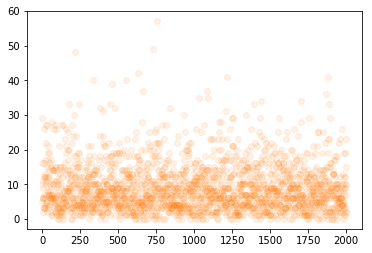

In [91]:
#plt.scatter(x=data.stars,y=pw,alpha=.1)
plt.scatter(x=test.index,y=pw_test,alpha=.1)
plt.show()

In [231]:
Year = train_year_array
Year = Year.reshape(len(Year),1)
#test
Year_T = test_year_array
Year_T = Year_T.reshape(len(Year_T),1)

Month = train_month_array
Month = Month.reshape(len(Month),1)
#test
Month_T = test_month_array
Month_T = Month_T.reshape(len(Month_T),1)


Date = train_day_array
Date = Date.reshape(len(Date),1)

Business = data.business_id
Business = Business.reshape(len(Business),1)
Business_T = test.business_id
Business_T = Business_T.reshape(len(Business_T),1)

Result = text_result

Reduced = reduced
#test
Reduced_Test = reduced_test

Positive_Word = pw
Positive_Word = Positive_Word.reshape(len(Positive_Word),1)
#test
Positive_Word_Test = pw_test
Positive_Word_Test = Positive_Word_Test.reshape(len(Positive_Word_Test),1)

Negative_Word = nw
Negative_Word = Negative_Word.reshape(len(Negative_Word),1)
#test
Negative_Word_Test = nw_test
Negative_Word_Test = Negative_Word_Test.reshape(len(Negative_Word_Test),1)

Star = data.stars
Star = Star.values.reshape(len(Star),1)


print(Positive_Word.shape)

(7997, 1)


/anaconda3/envs/python_test/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/anaconda3/envs/python_test/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [238]:
# concat data
X = np.concatenate((Negative_Word,Positive_Word,Reduced), axis = 1)
X_test = np.concatenate((Negative_Word_Test,Positive_Word_Test,Reduced_Test), axis = 1)

#X = Reduced
#X_test = Reduced_Test
Y = Star
print(X.shape)
print(Y.shape)
print(X_test.shape)
#X_train = np.array(X_train)
#Y = np.array(Y)
#X_test = np.array(X_test)
#print(X_test.shape)
#print(X_train.shape)

(7997, 4)
(7997, 1)
(2003, 4)


In [239]:
# split data to train and validation data
from sklearn.model_selection import train_test_split
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.33, random_state=42)

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import tree
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.cross_validation import LabelKFold
import pylab as pl


from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
import numpy as np
import os

/anaconda3/envs/python_test/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.
/anaconda3/envs/python_test/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [240]:
from sklearn import svm

clf_SVM = svm.SVC()
clf_SVM.fit(X_train, Y_train)

Y_predicted = clf_SVM.predict(X_validation)
rmse = sqrt(mean_squared_error(Y_validation,Y_predicted))
print(rmse) 

#2 compo & Year -> 1.37

/anaconda3/envs/python_test/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.337823877523767


In [241]:
#SVM predict
SVM_Y_test_predicted = clf_SVM.predict(X_test)
print(SVM_Y_test_predicted.shape)

Y_test_predicted_SVM = pd.Series(SVM_Y_test_predicted)
Y_predict_svm = Y_test_predicted_SVM

(2003,)


In [242]:
# multiclass
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer

classif = OneVsRestClassifier(estimator=SVC(random_state=0))
classif.fit(X_train, Y_train)
Y_predicted = classif.predict(X_validation)
rmse = sqrt(mean_squared_error(Y_validation,Y_predicted))
print(rmse)



1.4552673398049687


In [243]:
from sklearn.svm import SVR
n_samples, n_features = 20, 10

SVR(C=5.0, cache_size=100, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
clf_svr = SVR(C=5.0, epsilon=0.2)
clf_svr.fit(X_train, Y_train) 
Y_predicted = clf_svr.predict(X_validation)
rmse = sqrt(mean_squared_error(Y_validation,Y_predicted))
print(rmse)



/anaconda3/envs/python_test/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.1478420745411277


In [197]:
#SVR predict
SVR_Y_test_predicted = clf_svr.predict(X_test)
print(SVR_Y_test_predicted.shape)
Y_test_predicted_svr = []
Y_test_predicted_SVR = pd.Series(SVR_Y_test_predicted)
#Y_test_predicted_SVR = Y_test_predicted_SVR.astype(int)
for i in range(len(Y_test_predicted_SVR)):
    r = round(Y_test_predicted_SVR[i]).astype(int)
    Y_test_predicted_svr = np.append(Y_test_predicted_svr,r)
        
Y_predict_svr = Y_test_predicted_svr.astype(int)
Y_predict_SVR = Y_test_predicted_SVR
Predict_svr = []
for i in range(len(Y_predict_svr)):
    s = '{},{}'.format(test.review_id[i],Y_predict_svr[i])
    Predict_svr = np.append(Predict_svr,s)
Predict_svr = pd.Series(Predict_svr)
#Predict_svr

(2003,)


In [65]:
Predict_svm = []
for i in range(len(Y_predict_svm)):
    s = '{},{}'.format(test.review_id[i],Y_predict_svm[i])
    Predict_svm = np.append(Predict_svm,s)
Predict_svm = pd.Series(Predict_svm)
#Predict_svm

In [144]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
nn = nn.fit(X_train, Y_train)
Y_predicted = nn.predict(X_validation)
rmse = sqrt(mean_squared_error(Y_validation,Y_predicted))
print(rmse)

/anaconda3/envs/python_test/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.2668560464489413


In [198]:
# neuron network
# predict
nn_Y_test_predicted = nn.predict(X_test)
print(nn_Y_test_predicted.shape)

nn_Y_test_predicted = pd.Series(nn_Y_test_predicted)
#Y_test_predicted_nn.astype(int)
Y_test_predicted_nn = []
for i in range(len(nn_Y_test_predicted)):
    n = round(nn_Y_test_predicted[i],0)
    #print(t)
    Y_test_predicted_nn = np.append(Y_test_predicted_nn,n)
Y_test_predicted_nn = pd.Series(Y_test_predicted_nn)
Y_predict_nn = Y_test_predicted_nn.astype(int)
print(Y_predict_nn.shape)

Predict_nn = []
for i in range(len(Y_predict_nn)):
    s = '{},{}'.format(test.review_id[i],Y_predict_nn[i])
    Predict_nn = np.append(Predict_nn,s)
Predict_nn = pd.Series(Predict_nn)
#Predict_nn.astype(str)

(2003,)
(2003,)


In [234]:
# dicision tree 
clftree = tree.DecisionTreeClassifier()
clftree = clftree.fit(X_train, Y_train)
Y_predicted = clftree.predict(X_validation)
rmse = sqrt(mean_squared_error(Y_validation,Y_predicted))
print(rmse)

1.6965874840128614


In [147]:
# decision tree
# predict
clftree_Y_test_predicted = clftree.predict(X_test)
print(clftree_Y_test_predicted.shape)

clftree_Y_test_predicted = pd.Series(clftree_Y_test_predicted)
Y_test_predicted_t = []
for i in range(len(clftree_Y_test_predicted)):
    t = round(clftree_Y_test_predicted[i],0)
    #print(t)
    Y_test_predicted_t = np.append(Y_test_predicted_t,t)
Y_test_predicted_t = pd.Series(Y_test_predicted_t)
Y_test_predicted_t = Y_test_predicted_t.astype(int)
Y_predict_t = Y_test_predicted_t
print(Y_predict_t.shape)

Predict_t = []
for i in range(len(Y_predict_t)):
    s = '{},{}'.format(test.review_id[i],Y_predict_t[i])
    Predict_t = np.append(Predict_t,s)
Predict_t = pd.Series(Predict_t)
#Predict_t.astype(str)




(2003,)
(2003,)


In [245]:
from sklearn import ensemble
clf = ensemble.GradientBoostingClassifier()
clf_gb = clf.fit(X_train, Y_train)
Y_predicted = clf_gb.predict(X_validation)
rmse = sqrt(mean_squared_error(Y_validation,Y_predicted))
print(rmse)

/anaconda3/envs/python_test/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.344179371147386


In [246]:
#Gradiant Boosting
# predict
clfgb_Y_test_predicted = clf_gb.predict(X_test)
print(clfgb_Y_test_predicted.shape)

clfgb_Y_test_predicted = pd.Series(clfgb_Y_test_predicted)
Y_test_predicted_gb = []
for i in range(len(clfgb_Y_test_predicted)):
    t = round(clftree_Y_test_predicted[i],0)
    #print(t)
    Y_test_predicted_gb = np.append(Y_test_predicted_gb,t)
Y_test_predicted_gb = pd.Series(Y_test_predicted_gb)
Y_test_predicted_gb = Y_test_predicted_gb.astype(int)
Y_predict_gb = Y_test_predicted_gb
print(Y_predict_gb.shape)

Predict_gb = []
for i in range(len(Y_predict_gb)):
    s = '{},{}'.format(test.review_id[i],Y_predict_gb[i])
    Predict_gb = np.append(Predict_gb,s)
Predict_gb = pd.Series(Predict_gb)
#Predict_gb.astype(str)



(2003,)
(2003,)


In [216]:
### Save Text ###
fmt='%s'
np.savetxt("Predict_gb.txt", Predict_gb, fmt=fmt,delimiter='\t')

In [217]:
txt = [] #Initial the list 
with open('Predict_gb.txt') as f:
    for line in f: #For loop for read the file line by line
        inner_list = [elt.strip() for elt in line.split(',')] #Read each line of file and split the string with respect to ,(comma)
        txt.append(inner_list) #Append each line of the file into the list 
df_txt = pd.DataFrame(txt) # Transform the file data type from list to dataframe
df_txt.to_csv('predict_gb.csv')